# House Price Prediction

Goal: A key challenge for property sellers is to determine the sale price of the property. The 
ability to predict the exact property value is beneficial for property investors as well as 
for buyers to plan their finances according to the price trend. The property prices 
depend on the number of features like the property area, basement square footage, year 
built, number of bedrooms, and so on.

### Import Libraries

In [994]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from pandas.api.types import CategoricalDtype

### Load Dataset

In [995]:
house = pd.read_csv(r"C:\Users\Dell\Downloads\HousePrices.csv")

In [996]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [997]:
house.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [998]:
house.shape

(2073, 81)

### Information about data

In [999]:
house.info

<bound method DataFrame.info of         Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0        1          60         RL         65.0     8450      Pave   NaN   
1        2          20         RL         80.0     9600      Pave   NaN   
2        3          60         RL         68.0    11250      Pave   NaN   
3        4          70         RL         60.0     9550      Pave   NaN   
4        5          60         RL         84.0    14260      Pave   NaN   
5        6          50         RL         85.0    14115      Pave   NaN   
6        7          20         RL         75.0    10084      Pave   NaN   
7        8          60         RL          NaN    10382      Pave   NaN   
8        9          50         RM         51.0     6120      Pave   NaN   
9       10         190         RL         50.0     7420      Pave   NaN   
10      11          20         RL         70.0    11200      Pave   NaN   
11      12          60         RL         85.0    11924      Pave   

In [1000]:
house.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [1001]:
house.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [1002]:
int_features = house.select_dtypes(include=["int64"]).columns
print("Total no. of integer features : ", int_features.shape[0])
print("Integer feature names : ",int_features.tolist())

Total no. of integer features :  35
Integer feature names :  ['Id', 'Dwell_Type', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price']


In [1003]:
float_features = house.select_dtypes(include=["float64"]).columns
print("Total no. of float features : ", float_features.shape[0])
print("Float feature names : ",float_features.tolist())

Total no. of float features :  3
Float feature names :  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [1004]:
cat_features = house.select_dtypes(include=["object"]).columns
print("Total no. of categorical features : ", cat_features.shape[0])
print("Categorical feature names : ",cat_features.tolist())

Total no. of categorical features :  43
Categorical feature names :  ['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [1005]:
house.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Handling Missing Value

<AxesSubplot:>

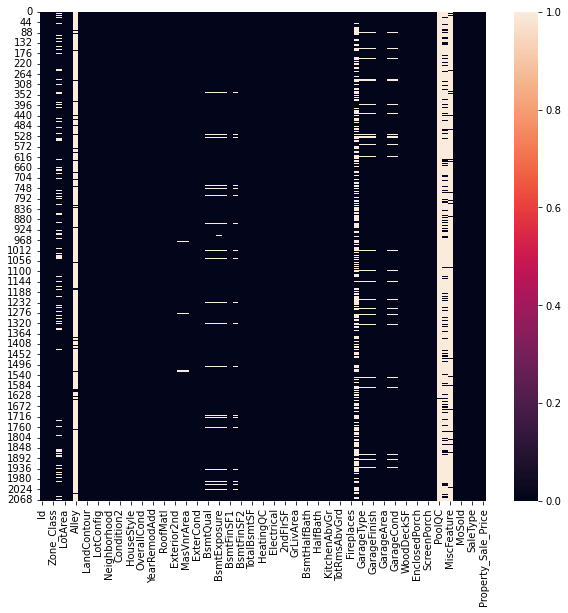

In [1006]:
plt.figure(figsize=(10,9))
sns.heatmap(house.isnull())

### Percent of missing values

In [1007]:
house = house.set_index("Id")

In [1008]:
null_count = house.isnull().sum()
null_count

Dwell_Type                0
Zone_Class                0
LotFrontage             320
LotArea                   0
Road_Type                 0
Alley                  1944
Property_Shape            0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
Dwelling_Type             0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType               14
MasVnrArea               14
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 59
BsmtCond                 59
BsmtExposure             61
BsmtFinType1             59
BsmtFinSF1                0
BsmtFinType2             60
BsmtFinSF2          

In [1009]:
null_percent = house.isnull().sum()/house.shape[0] * 100
null_percent

Dwell_Type              0.000000
Zone_Class              0.000000
LotFrontage            15.436565
LotArea                 0.000000
Road_Type               0.000000
Alley                  93.777135
Property_Shape          0.000000
LandContour             0.000000
Utilities               0.000000
LotConfig               0.000000
LandSlope               0.000000
Neighborhood            0.000000
Condition1              0.000000
Condition2              0.000000
Dwelling_Type           0.000000
HouseStyle              0.000000
OverallQual             0.000000
OverallCond             0.000000
YearBuilt               0.000000
YearRemodAdd            0.000000
RoofStyle               0.000000
RoofMatl                0.000000
Exterior1st             0.000000
Exterior2nd             0.000000
MasVnrType              0.675350
MasVnrArea              0.675350
ExterQual               0.000000
ExterCond               0.000000
Foundation              0.000000
BsmtQual                2.846117
BsmtCond  

### Drop features

In [1010]:
## As per domain knowledge we will not drop these features
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.777135
PoolQC         99.614086
Fence          80.511336
MiscFeature    96.140859
dtype: float64

In [1011]:
## As per domain knowledge we will not drop this feature
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 50)]
miss_value_20_50_perc

FireplaceQu    47.660396
dtype: float64

In [1012]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
miss_value_5_20_perc

LotFrontage     15.436565
GarageType       5.451037
GarageYrBlt      5.451037
GarageFinish     5.451037
GarageQual       5.451037
GarageCond       5.451037
dtype: float64

<AxesSubplot:ylabel='Id'>

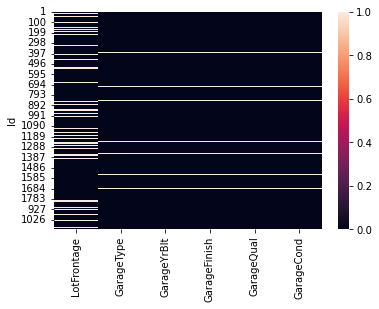

In [1013]:
sns.heatmap(house[miss_value_5_20_perc.keys()].isnull())

As per domain knowledge we will not drop any feature

### Missing Value Imputation

In [1014]:
missing_value_feature =  null_percent[null_percent > 0]
print("Total missing value features = ", len(missing_value_feature))

Total missing value features =  19


In [1015]:
missing_value_feature

LotFrontage     15.436565
Alley           93.777135
MasVnrType       0.675350
MasVnrArea       0.675350
BsmtQual         2.846117
BsmtCond         2.846117
BsmtExposure     2.942595
BsmtFinType1     2.846117
BsmtFinType2     2.894356
Electrical       0.048239
FireplaceQu     47.660396
GarageType       5.451037
GarageYrBlt      5.451037
GarageFinish     5.451037
GarageQual       5.451037
GarageCond       5.451037
PoolQC          99.614086
Fence           80.511336
MiscFeature     96.140859
dtype: float64

In [1016]:
cat_na_feat = missing_value_feature[missing_value_feature.keys().isin(cat_features)]
print("Total number of categorical missing features = ", len(cat_na_feat))
cat_na_feat

Total number of categorical missing features =  16


Alley           93.777135
MasVnrType       0.675350
BsmtQual         2.846117
BsmtCond         2.846117
BsmtExposure     2.942595
BsmtFinType1     2.846117
BsmtFinType2     2.894356
Electrical       0.048239
FireplaceQu     47.660396
GarageType       5.451037
GarageFinish     5.451037
GarageQual       5.451037
GarageCond       5.451037
PoolQC          99.614086
Fence           80.511336
MiscFeature     96.140859
dtype: float64

In [1017]:
int_na_feat = missing_value_feature[missing_value_feature.keys().isin(int_features)]
print("Total number of integer missing features = ", len(int_na_feat))
int_na_feat

Total number of integer missing features =  0


Series([], dtype: float64)

In [1018]:
float_na_feat = missing_value_feature[missing_value_feature.keys().isin(float_features)]
print("Total number of float missing features = ", len(float_na_feat))
float_na_feat

Total number of float missing features =  3


LotFrontage    15.436565
MasVnrArea      0.675350
GarageYrBlt     5.451037
dtype: float64

### Handling Alley

In [1019]:
### Create a copy of data
df_mvi = house.copy()
df_mvi.shape

(2073, 80)

In [1020]:
df_mvi["Alley"].value_counts()

Grvl    72
Pave    57
Name: Alley, dtype: int64

In [1021]:
alley_count = "NA"
df_mvi["Alley"].replace(np.nan, alley_count, inplace = True )
df_mvi["Alley"].isnull().sum()

0

In [1022]:
def oldNewCountPlot(house, df_new, feature):
    plt.subplot(121)
    sns.countplot(house["Alley"])
    plt.subplot(122)
    sns.countplot(df_new["Alley"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


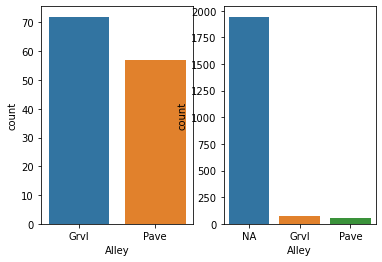

In [1023]:
oldNewCountPlot(house, df_mvi, "Alley")

### Handling LotFrontage

In [1024]:
def boxHistPlot(house, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(house)
    plt.subplot(122)
    sns.distplot(house)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


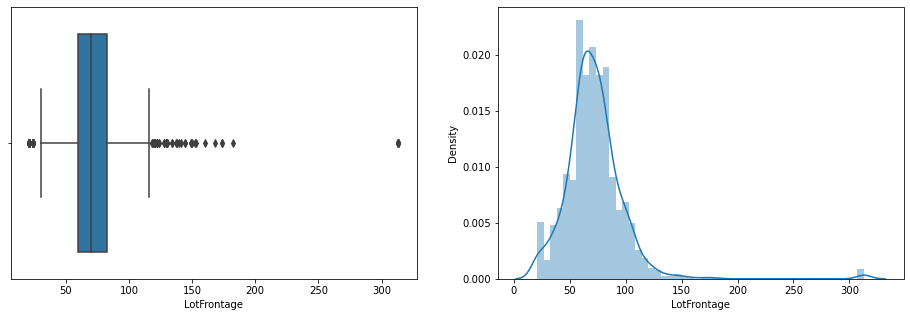

In [1025]:
boxHistPlot(house["LotFrontage"])

In [1026]:
lotfrontage_median = house["LotFrontage"].median()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_median, inplace = True)
df_mvi["LotFrontage"].isnull().sum()

0

In [1027]:
def oldNewBoxHistPlot(house, df_new, feature, figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(house[feature])
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(house[feature])
    plt.title("New Data Distribution")
    
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("New Data Distribution")

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:

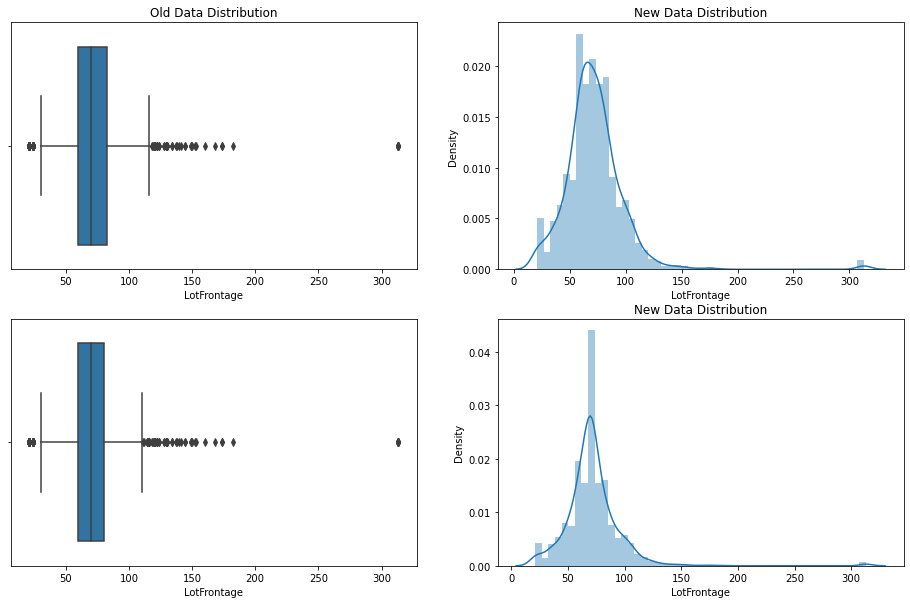

In [1028]:
oldNewBoxHistPlot(house, df_mvi, "LotFrontage")

### Handling MasVnrType and MasVnrArea

<AxesSubplot:ylabel='Id'>

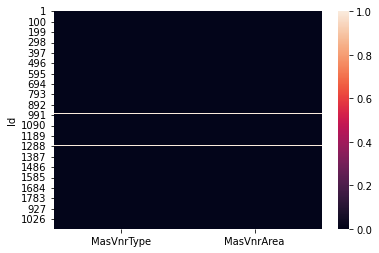

In [1029]:
sns.heatmap(house[["MasVnrType","MasVnrArea"]].isnull())

In [1030]:
masvnrtype_mode = house["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace = True )
df_mvi["MasVnrType"].isnull().sum()

0

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


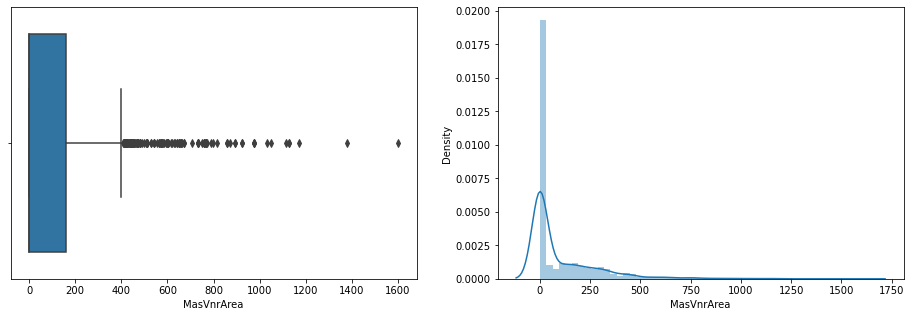

In [1031]:
boxHistPlot(house["MasVnrArea"])

In [1032]:
masvnrarea_mode = 0
df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_mode, inplace = True )
df_mvi["MasVnrArea"].isnull().sum()

0

### Handling basement features

In [1033]:
cat_bsmt_feature = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

<AxesSubplot:ylabel='Id'>

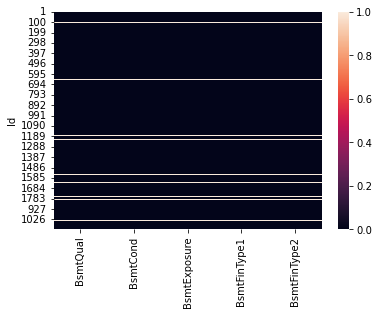

In [1034]:
sns.heatmap(house[cat_bsmt_feature].isnull())

In [1035]:
for feat in cat_bsmt_feature:
    print(f"Value count of {feat}: {house[feat].value_counts()}")

Value count of BsmtQual: Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64
Value count of BsmtCond: TA    1851
Gd     100
Fa      61
Po       2
Name: BsmtCond, dtype: int64
Value count of BsmtExposure: No    1349
Av     322
Gd     181
Mn     160
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1: Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2: Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64


In [1036]:
bsmt_cont = "NA"
for feat in cat_bsmt_feature:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)

In [1037]:
df_mvi[cat_bsmt_feature].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

### Handling Electrical

In [1038]:
house["Electrical"].value_counts()

SBrkr    1901
FuseA     127
FuseF      40
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1039]:
electrical_mode = house["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

0

### Handling remaining categorical features

In [1040]:
other_cat_feat=["FireplaceQu","PoolQC","Fence","MiscFeature"]     
for feat in other_cat_feat:
    print(f"Value count of {feat}: {house[feat].value_counts()}")

Value count of FireplaceQu: Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: FireplaceQu, dtype: int64
Value count of PoolQC: Gd    4
Ex    2
Fa    2
Name: PoolQC, dtype: int64
Value count of Fence: MnPrv    233
GdPrv     88
GdWo      69
MnWw      14
Name: Fence, dtype: int64
Value count of MiscFeature: Shed    74
Othr     3
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


In [1041]:
fireplacequ_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont , inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [1042]:
poolqc_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, poolqc_cont , inplace=True)
df_mvi["PoolQC"].isnull().sum()

0

In [1043]:
fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, fence_cont , inplace=True)
df_mvi["Fence"].isnull().sum()

0

In [1044]:
miscfeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan, miscfeature_cont , inplace=True)
df_mvi["MiscFeature"].isnull().sum()

0

### Handling garage features

In [1045]:
cat_garage_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

In [1046]:
garage_cont ="NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont, inplace=True)
    
df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [1047]:
garage_num = 0
df_mvi["GarageYrBlt"].replace(np.nan, garage_num, inplace=True)
df_mvi["GarageYrBlt"].isnull().sum()

0

In [1048]:
df_mvi.isnull().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
Alley                  0
Property_Shape         0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0


### Feature Transformation

In [1049]:
# converting columns in str which have categorical nature but in int64
for_num_conv = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [1050]:
feat_dtype_convert = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in feat_dtype_convert:
    df_mvi[i] = df_mvi[i].astype(str)

In [1051]:
df_mvi[for_num_conv].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,
1,2003,2003,2003.0,2,2008
2,1976,1976,1976.0,5,2007
3,2001,2002,2001.0,9,2008
4,1915,1970,1998.0,2,2006
5,2000,2000,2000.0,12,2008


In [1052]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [1053]:
calendar.month_abbr[12]

'Dec'

In [1054]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])

In [1055]:
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [1056]:
for feat in for_num_conv:
    df_mvi[feat] =  df_mvi[feat].astype(str)

In [1057]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


### Convert categorical feature into numerical features

#### Ordinal Encoding

In [1058]:
ordinal_end_var = ['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
       'GarageCond', 'PoolQC', 'Functional', 'PavedDrive', 'GarageFinish', 'Utilities' ]
print("Total no of feature to convert ordinal numerical format:", len(ordinal_end_var))

Total no of feature to convert ordinal numerical format: 18


In [1059]:
df_mvi["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [1060]:
df_mvi["ExterQual"]= df_mvi["ExterQual"].astype(CategoricalDtype(categories = ["Po","Fa","TA","Gd","Ex"], ordered=True)).cat.codes

In [1061]:
df_mvi["ExterQual"].value_counts()

2    1272
3     706
4      76
1      19
Name: ExterQual, dtype: int64

In [1062]:
df_mvi["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

In [1063]:
df_mvi["BsmtExposure"]= df_mvi["BsmtExposure"].astype(CategoricalDtype(categories = ["NA","No","Mn","Av","Gd"], ordered=True)).cat.codes

In [1064]:
df_mvi["BsmtExposure"].value_counts()

1    1349
3     322
4     181
2     160
0      61
Name: BsmtExposure, dtype: int64

In [1065]:
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [1066]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 1 to 946
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2073 non-null   int64  
 1   Zone_Class           2073 non-null   object 
 2   LotFrontage          2073 non-null   float64
 3   LotArea              2073 non-null   int64  
 4   Road_Type            2073 non-null   object 
 5   Alley                2073 non-null   object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   int8   
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   ob

### One hot encoding for Nominal Categorical Data

In [1067]:
df_encod = df_mvi.copy()
object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type features :" ,len(object_features))
print("Features: \n", object_features)

Total object data type features : 33
Features: 
 ['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [1068]:
df_encod[object_features].head()

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,FireplaceQu,GarageType,GarageYrBlt,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,NA,Attchd,2003.0,NA,NA,NA,Feb,2008,WD,Normal
2,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,TA,Attchd,1976.0,NA,NA,NA,May,2007,WD,Normal
3,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,TA,Attchd,2001.0,NA,NA,NA,Sep,2008,WD,Normal
4,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Gd,Detchd,1998.0,NA,NA,NA,Feb,2006,WD,Abnorml
5,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,TA,Attchd,2000.0,NA,NA,NA,Dec,2008,WD,Normal


In [1069]:
print("Shape of DF before encoding : ", df_encod.shape)
df_encod = pd.get_dummies(df_encod, columns= object_features, prefix = object_features, drop_first=True)
print("Shape of DF after encoding : ", df_encod.shape)

Shape of DF before encoding :  (2073, 80)
Shape of DF after encoding :  (2073, 514)


In [1070]:
df_encod.head()

,Dwell_Type,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Property_Sale_Price,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_NA,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1902,YearBuilt_1903,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1909,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1943,YearBuilt_1944,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_

### Train Test Split

In [1071]:
X = df_encod.drop("Property_Sale_Price", axis=1)

In [1072]:
Y = df_encod["Property_Sale_Price"]

In [1073]:
X.head()

,Dwell_Type,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_NA,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1902,YearBuilt_1903,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1909,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1943,YearBuilt_1944,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_19

In [1074]:
Y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: Property_Sale_Price, dtype: int64

In [1075]:
X.shape

(2073, 513)

In [1076]:
Y.shape

(2073,)

In [1077]:
from sklearn.model_selection import train_test_split

In [1078]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1079]:
X_train.shape

(1658, 513)

In [1080]:
X_test.shape

(415, 513)

In [1081]:
Y_train.shape

(1658,)

In [1082]:
Y_test.shape

(415,)

### Feature Scaling

In [1083]:
from sklearn.preprocessing import StandardScaler

In [1084]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [1085]:
X_train[:3,:]

array([[-0.0616295 , -0.78160589, -0.48924157, ..., -0.10476454,
         0.47383535, -0.31190794],
       [-0.17436306, -0.06824321, -0.71893347, ..., -0.10476454,
         0.47383535, -0.31190794],
       [-0.00526271,  0.09028183, -0.05200906, ..., -0.10476454,
         0.47383535, -0.31190794]])

In [1086]:
X_test[:3, :]

array([[-0.17436306, -0.26639951, -0.09040464, ..., -0.10476454,
         0.47383535, -0.31190794],
       [-0.0616295 , -0.46455581, -0.54626696, ..., -0.10476454,
         0.47383535, -0.31190794],
       [ 0.55840512, -1.49496857, -0.83707372, ..., -0.10476454,
         0.47383535, -0.31190794]])

In [1087]:
#sc.mean_
#sc.n_features_in_
#sc.n_samples_seen_
#sc.scale_
#sc.var_
#sc.with_mean
#sc.with_std

### Train Model

#### Linear Regression

In [1088]:
from sklearn.linear_model import LinearRegression
# create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train, Y_train)
#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

181325.40379565957
[-1.22585168e+02  1.35757170e+03  3.48073378e+03  2.35750736e+03
  1.54963660e+03  2.63630072e+03  6.05696947e+03  4.04816033e+03
  2.41903749e+02  2.88532190e+03 -1.25078090e+03  5.11221338e+03
  2.46458608e+03 -1.46726620e+15 -3.10624514e+02 -5.44035794e+14
 -1.47941998e+15  1.40522730e+15  9.72821454e+02 -1.34301459e+16
 -1.60338620e+16 -1.80989059e+15  1.89690435e+16  5.75994283e+02
  1.57628654e+03  2.77007471e+03  2.59953720e+03 -5.60539455e+03
 -4.25155975e+03  6.65904548e+03  4.66973929e+03  4.52152157e+03
  7.64475720e+03  1.34365649e+03  4.47676979e+03  5.15355113e+03
  5.83480959e+03 -3.68052483e+03 -1.35774693e+03  2.39834955e+03
  8.84586995e+02  3.45665208e+02  1.13305324e+03  3.07553120e+03
  2.04373131e+03  9.59334471e+02  5.36822619e+03  3.26298947e+03
  1.47935338e+04  1.34633589e+04  1.46169134e+03 -1.19961419e+02
  5.11789148e+02  1.58726063e+03  4.22964376e+02  1.52123649e+03
  2.60428618e+03 -3.03387604e+02  2.68186503e+03  3.28504034e+03
 -1.69

In [1089]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 7.90128100e+04  1.07569388e+05  1.74727623e+05  2.67696982e+05
  2.92617919e+05  1.07607966e+05  1.30209263e+05  7.97842007e+04
  1.04861638e+05  4.00805341e+05  1.13082935e+05  2.73682591e+05
 -1.17281007e+13  2.19564185e+05  1.07270904e+05  2.20908623e+05
  1.56459904e+05  2.31076310e+05  2.64539419e+05  9.05352007e+04
  1.03953263e+05  2.02116857e+05  1.65730154e+05  1.24111841e+05
  1.15189623e+05  1.96115951e+05  1.70703716e+05  1.49914810e+05
  1.71390091e+05  3.30590966e+05  3.05209732e+05  1.39823607e+05
  2.13097263e+05  3.37678419e+05  1.69882591e+05  1.88700623e+05
  2.75644857e+05  1.72894169e+05  1.44893623e+05  7.95632475e+04
  1.08055388e+05  1.48060451e+05  1.61404123e+05  2.99935685e+05
  1.43026248e+05  1.57289279e+05  1.22889982e+05  2.11984935e+05
  1.00125763e+05  1.15071716e+05  2.04441123e+05  8.16095444e+04
  1.70482404e+05  2.43498904e+05  1.45580263e+05  1.85878248e+05
  9.58966850e+04  2.38451888e+05  1.58380904e+05  2.22981388e+05
  2.35860201e+05  2.99618

In [1090]:
lm.score(X_train, Y_train)

0.941348694529883

In [1091]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: -2.308286374683851e+22
RMSE: 1.0939165924538344e+16
Adj R-square: -3.0678443671231173e+22


In [1092]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train, Y_train)
#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

181318.83956574186
[-1.26054375e+02  1.18700356e+03  3.40005432e+03  2.38983709e+03
  1.55189780e+03  2.64040466e+03  6.06534250e+03  4.04932314e+03
  2.41311539e+02  2.86578179e+03 -1.02344145e+03  5.25334300e+03
  2.59839266e+03  5.53570266e+03 -4.74426076e+02  1.39619383e+03
  4.05547963e+02  6.74759490e+03  9.92417656e+02  9.02172516e+03
  1.15727589e+04  2.92877414e+02  1.61973998e+04  8.19863222e+02
  1.55297618e+03  2.87455428e+03  2.58237213e+03 -5.53838620e+03
 -4.21547855e+03  6.68488477e+03  4.75787683e+03  4.41147737e+03
  7.52477897e+03  1.43487987e+03  4.70974897e+03  4.95008079e+03
  5.62884467e+03 -3.71761175e+03 -1.21223265e+03  2.42924549e+03
  8.11722744e+02  3.13708638e+02  1.14708592e+03  3.15466750e+03
  1.20551797e+04  8.50706253e+02  4.77645409e+03  2.76339309e+03
  1.34532974e+04  1.23216816e+04  1.53213622e+03 -2.32541557e+02
  4.76338240e+02  1.65448241e+03  1.77156263e+02  1.56145382e+03
  2.65025270e+03 -2.37471895e+02  2.74840062e+03  3.31385730e+03
 -1.69

In [1093]:
Y_pred=lm.predict(X_test)

In [1094]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test, Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6644354645260422
41708.77105130381
0.5540155756882357


In [1095]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train, Y_train)
#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

181318.83956574186
[-1.24024963e+02  1.33403628e+03  3.45555985e+03  2.38278103e+03
  1.53675840e+03  2.63075780e+03  6.06081332e+03  4.02997385e+03
  2.64247952e+02  2.89523288e+03 -1.24901099e+03  5.12686215e+03
  2.45616784e+03  9.22717119e+03 -3.23548642e+02  2.55296182e+03
  3.71194018e+03  3.92996735e+03  9.97573782e+02  1.81190376e+04
  2.25401114e+04  1.53703843e+03  3.65530088e+03  6.31288413e+02
  1.55788759e+03  2.77031219e+03  2.59746946e+03 -5.62026232e+03
 -4.25823577e+03  6.65441292e+03  4.62364677e+03  4.48403834e+03
  7.63810515e+03  1.33809231e+03  4.48958065e+03  5.15473915e+03
  5.74133836e+03 -3.70676187e+03 -1.30331580e+03  2.42098030e+03
  8.79287982e+02  3.13961470e+02  1.12863758e+03  3.08352035e+03
  4.03893849e+03  9.04151499e+02  5.20358316e+03  3.11357105e+03
  1.44552059e+04  1.31728017e+04  1.49267044e+03 -1.45523857e+02
  5.00490017e+02  1.59791809e+03  3.85485502e+02  1.52681035e+03
  2.58110132e+03 -2.82753346e+02  2.65686224e+03  3.29866520e+03
 -1.69

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.089e+11, tolerance: 1.067e+09
  model = cd_fast.enet_coordinate_descent(


In [1096]:
Y_pred=lm.predict(X_test)

In [1097]:
Y_pred=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test, Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.610705607435285
44924.00219443486
0.4826055282911549


#### Decision Tree

In [1098]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Train the model using the training data
regressor.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_tree = regressor.predict(X_test)


In [1099]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test, Y_pred_tree)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_tree))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8404265750934818
28762.03754721612
0.7879178085912086


#### Random Forest

In [1100]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_rf = rf_regressor.predict(X_test)


In [1101]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test, Y_pred_rf)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9167489041376835
20774.680109832112
0.8893545409706737


In [1102]:
print('Training score for Random Forest Regressor is',rf_regressor.score(X_train,Y_train))

Training score for Random Forest Regressor is 0.9860419493575849


In [1103]:
print('Testing score for Random Forest Regressor is',rf_regressor.score(X_test,Y_test))

Testing score for Random Forest Regressor is 0.9167489041376835


#### Hyperparameter tuning Random Forest

In [1104]:
from sklearn.model_selection import RandomizedSearchCV

In [1105]:
random_grid = {'n_estimators': [100,200,300,400,500,600],  ## no. of trees
               'max_features': ['auto', 'sqrt'],  
               'max_depth': [10, 15,20,25], ## maxinum number of levels in trees 
               'min_samples_split':  [2, 5, 10], ## minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], ## Minimum number of samples required at each leaf node
               'bootstrap': [True, False]}  ##  Method of selecting samples for training each tree

In [1106]:
hyper_tuning=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_grid,n_iter=10,cv=5,verbose=5,random_state=2)

In [1107]:
hyper_tuning.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.878 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.914 total time=   1.8s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.887 total time=   1.8s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.821 total time=   2.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.837 total time=   4.0s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.892 total time=   1.2s
[CV 2/5] END boo

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=2, verbose=5)

In [1108]:
hyper_tuning.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 25,
 'bootstrap': True}

In [1109]:
RF_hyper_tuning=RandomForestRegressor(n_estimators=400,min_samples_split=2,min_samples_leaf= 4,max_features='auto',max_depth=25,bootstrap= False)

In [1110]:
RF_hyper_tuning.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=False, max_depth=25, min_samples_leaf=4,
                      n_estimators=400)

In [1111]:
RF_hyper_pred_test=RF_hyper_tuning.predict(X_test) ## predicted hyperparametric tuning x test

RF_hyper_pred_test

array([108917.33333333, 124250.        , 155087.8125    , 257140.        ,
       294650.        , 150200.        , 129071.42857143,  79800.        ,
       127333.33333333, 319521.29166667, 163147.83333333, 286833.33333333,
       163385.71428571, 235834.3075    , 139125.        , 223900.        ,
       150625.        , 186266.66666667, 243133.        , 125900.        ,
       112150.        , 194871.382     , 150780.        , 147125.        ,
       104880.        , 153375.        , 168460.        , 139125.        ,
       168092.71428571, 410109.759625  , 251583.33333333, 140905.375     ,
       212610.        , 382727.8       , 138187.5       , 220850.        ,
       254312.        , 132394.45714286, 149750.        ,  79800.        ,
       109650.        , 138420.83333333, 204250.        , 310552.2       ,
       129071.42857143, 125162.5       , 115985.71428571, 218696.71428572,
       122125.        , 168233.33333333, 183825.        ,  65327.75      ,
       179633.33333333, 2

In [1112]:
Y_test

Id
1660    121000
75      107400
116     176000
565     268000
876     303477
1151    124000
1133    117500
936      79900
1186    104900
162     412500
1451    136000
1066    328000
1249    129500
1366    216000
397     123000
632     209500
1532    159000
1632    175900
1242    248328
437     116000
1136    102000
508     208300
628     153000
780     135000
450     120000
972     173000
1484    179200
1695    143750
88      164500
1360    315000
250     277000
293     131000
95      204750
113     383970
1675    142125
959     185000
47      239686
1572    136900
781     176000
1002     86000
1687    110000
25      154000
850     187000
344     266000
636     200000
1676    147500
1405    105000
512     202665
1115    117000
368     165000
63      202500
30       68500
1469    177000
48      249700
1537    129900
949     192500
122     100000
1636    223000
509     161000
705     213000
908     250000
306     305900
1165    194000
1048    145000
925     207500
681     143000
1244   

In [1113]:
RF_hyper_pred_train=RF_hyper_tuning.predict(X_train)  ## predicted hyper parametric tuning x train

RF_hyper_pred_train

array([127600.        ,  80000.        , 184857.14285714, ...,
       137475.        , 166941.66666667, 251583.33333333])

In [1114]:
print('Training score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(X_train,Y_train))

Training score for Random Forest Regressor Hyper Parametric Tuning is  0.9617923828175011


In [1115]:
print('Testing score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(X_test,Y_test))

Testing score for Random Forest Regressor Hyper Parametric Tuning is  0.8254718453573463


#### SVR

In [1116]:
from sklearn.svm import SVR

In [1117]:
svr_regressor = SVR(kernel='linear', gamma='scale', C=1.0)

# Train the model
svr_regressor.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svr = svr_regressor.predict(X_test)

In [1118]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test, Y_pred_svr)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_svr))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.29901549259687643
60282.82212976673
0.06835157194402053


#### KNN

In [1119]:
from sklearn.neighbors import KNeighborsRegressor

In [1120]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_knn = knn_regressor.predict(X_test)

In [1121]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test, Y_pred_knn)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6017395044318574
45438.39479477973
0.4706890655438156


#### Gradient Boosting

In [1122]:
from sklearn.ensemble import GradientBoostingRegressor

In [1123]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_regressor.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_gb = gb_regressor.predict(X_test)

In [1124]:
r2=r2_score(Y_test, Y_pred_gb)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_gb))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9168381259583297
20763.5448109359
0.8894731218637968


In [1125]:
print('Training score for Gradient Boost Regressor Hyper Parametric Tuning is ',gb_regressor.score(X_train,Y_train))

Training score for Gradient Boost Regressor Hyper Parametric Tuning is  0.9641827813672071


In [1126]:
print('Testing score for Gradient Boost Regressor Hyper Parametric Tuning is ',gb_regressor.score(X_test,Y_test))

Testing score for Gradient Boost Regressor Hyper Parametric Tuning is  0.9168381259583297


### Feature selection using feature importances

#### Gradient Boost

In [1127]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_regressor.fit(X, Y)

# Get feature importances
importances = gb_regressor.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")


Dwell_Type: 0.0004109222442974199
LotFrontage: 0.0011679958443491399
LotArea: 0.004313424816489385
Utilities: 0.0
OverallQual: 0.0029416702866788443
OverallCond: 0.002264166821384249
MasVnrArea: 0.0027671510338214715
ExterQual: 0.2581286978272179
ExterCond: 0.0
BsmtQual: 0.05180031201290006
BsmtCond: 0.0002676560971371196
BsmtExposure: 0.009854404098974435
BsmtFinType1: 0.009593812235130344
BsmtFinSF1: 0.028592803046954256
BsmtFinType2: 0.0
BsmtFinSF2: 0.000221864158321593
BsmtUnfSF: 0.0013475668108112364
TotalBsmtSF: 0.12132887782873027
HeatingQC: 0.0004479854833891552
1stFlrSF: 0.014464206584092578
2ndFlrSF: 0.031778771122547414
LowQualFinSF: 0.00015670970566359423
GrLivArea: 0.17619024658472435
BsmtFullBath: 0.00036148079103618205
BsmtHalfBath: 0.0
FullBath: 0.0009317358223217565
HalfBath: 0.0022875176789931046
BedroomAbvGr: 0.0005205206501423327
KitchenAbvGr: 0.0026378708644397546
KitchenQual: 0.06101015364662813
TotRmsAbvGrd: 0.013890689024240798
Functional: 0.0017264835874795709


In [1128]:
zero_importance_indices = np.where(importances == 0)[0]

# List of feature names with zero importance
zero_importance_features = [X.columns[i] for i in zero_importance_indices]


In [1129]:
zero_importance_features

['Utilities',
 'ExterCond',
 'BsmtFinType2',
 'BsmtHalfBath',
 'PavedDrive',
 '3SsnPorch',
 'MiscVal',
 'Zone_Class_FV',
 'Zone_Class_RH',
 'Road_Type_Pave',
 'Alley_NA',
 'Property_Shape_IR3',
 'LandContour_HLS',
 'LotConfig_FR2',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_PosN',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Dwelling_Type_2fmCon',
 'Dwelling_Type_Duplex',
 'Dwelling_Type_Twnhs',
 'Dwelling_Type_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'Hous

In [1130]:
X_filtered = X.drop(columns=zero_importance_features)

In [1131]:
X_filtered.shape

(2073, 117)

In [1132]:
X_train_filtered, X_test_filtered, Y_train, Y_test = train_test_split(X_filtered, Y, test_size = 0.2)

In [1133]:
sc = StandardScaler()
sc.fit(X_train_filtered)
X_train_filtered = sc.transform(X_train_filtered)
X_test_filtered = sc.transform(X_test_filtered)

In [1134]:
gb_regressor_new = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_regressor_new.fit(X_train_filtered, Y_train)

# Make predictions on the test set
Y_pred_gb_new = gb_regressor_new.predict(X_test_filtered)

In [1135]:
r2=r2_score(Y_test, Y_pred_gb_new)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_gb_new))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X_filtered.shape[1]-1)
print(adjusted_r_squared)

0.9272911636570755
22740.127822465227
0.9229397908426908


In [1136]:
print('Training score for Gradient Boost Regressor is ',gb_regressor_new.score(X_train_filtered,Y_train))

Training score for Gradient Boost Regressor is  0.9612167260942915


In [1137]:
print('Testing score for Gradient Boost Regressor is ',gb_regressor_new.score(X_test_filtered,Y_test))

Testing score for Gradient Boost Regressor is  0.9272911636570755


#### KNN

In [1149]:
from sklearn.neighbors import KNeighborsRegressor

In [1150]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train_filtered, Y_train)

# Make predictions on the test set
Y_pred_knn = knn_regressor.predict(X_test_filtered)

In [1151]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test, Y_pred_knn)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X_filtered.shape[1]-1)
print(adjusted_r_squared)

0.7256683451673682
44171.00352173699
0.7092505428065407


In [1152]:
print('Training score for KNN Regressor is ',knn_regressor.score(X_train_filtered,Y_train))

Training score for KNN Regressor is  0.8511734768275281


In [1153]:
print('Testing score for KNN Regressor is ',knn_regressor.score(X_test_filtered,Y_test))

Testing score for KNN Regressor is  0.7256683451673682


#### Decision Tree

In [1154]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Train the model using the training data
regressor.fit(X_train_filtered, Y_train)

# Make predictions on the test data
Y_pred_tree = regressor.predict(X_test_filtered)

In [1155]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test, Y_pred_tree)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_tree))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X_filtered.shape[1]-1)
print(adjusted_r_squared)

0.8354885236217905
34205.615093685265
0.825643079766931


In [1168]:
print('Training score for DT Regressor is ',regressor.score(X_train_filtered,Y_train))

Training score for DT Regressor is  1.0


In [1169]:
print('Testing score for DT Regressor is ',regressor.score(X_test_filtered,Y_test))

Testing score for DT Regressor is  0.8354885236217905


#### Random Forest

In [1158]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train_filtered, Y_train)

# Make predictions on the test set
Y_pred_rf = rf_regressor.predict(X_test_filtered)

In [1161]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test, Y_pred_rf)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_tree))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X_filtered.shape[1]-1)
print(adjusted_r_squared)

0.9138403259055627
34205.615093685265
0.9086839668932614


In [1166]:
print('Training score for RF Regressor is ',rf_regressor.score(X_train_filtered,Y_train))

Training score for RF Regressor is  0.9842487200522732


In [1167]:
print('Testing score for RF Regressor is ',rf_regressor.score(X_test_filtered,Y_test))

Testing score for RF Regressor is  0.9138403259055627


#### Neural Networks

In [1143]:
from sklearn.neural_network import MLPRegressor

In [1144]:
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42,
                            max_iter=1000, early_stopping=True, n_iter_no_change=10)

# Train the model
nn_regressor.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_nn = nn_regressor.predict(X_test)

In [1145]:
r2=r2_score(Y_test, Y_pred_nn)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_nn))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

-0.4140612301406308
100284.40730116762
-0.8793681006102545


#### ANN

In [1146]:
from tensorflow import keras
from tensorflow.keras import layers

In [1147]:
# Build the Neural Network model
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the test set
Y_pred_ann = model.predict(X_test).flatten()

Epoch 1/100
42/42 [==============================] - 1s 9ms/step - loss: 38390206464.0000 - val_loss: 40102739968.0000
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 38374805504.0000 - val_loss: 40075984896.0000
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 38317735936.0000 - val_loss: 39990939648.0000
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 38164979712.0000 - val_loss: 39789395968.0000
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 37847642112.0000 - val_loss: 39412916224.0000
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 37298520064.0000 - val_loss: 38802604032.0000
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 36463017984.0000 - val_loss: 37912035328.0000
Epoch 8/100
42/42 [==============================] - 0s 5ms/step - loss: 35301822464.0000 - val_loss: 36713054208.0000
Epoch 9/100
42/42 [=============================

42/42 [==============================] - 0s 4ms/step - loss: 4364300800.0000 - val_loss: 9307073536.0000
Epoch 71/100
42/42 [==============================] - 0s 4ms/step - loss: 4338731008.0000 - val_loss: 9311177728.0000
Epoch 72/100
42/42 [==============================] - 0s 4ms/step - loss: 4316284928.0000 - val_loss: 9310187520.0000
Epoch 73/100
42/42 [==============================] - 0s 4ms/step - loss: 4290012160.0000 - val_loss: 9304624128.0000
Epoch 74/100
42/42 [==============================] - 0s 5ms/step - loss: 4268798720.0000 - val_loss: 9304841216.0000
Epoch 75/100
42/42 [==============================] - 0s 4ms/step - loss: 4245536256.0000 - val_loss: 9302032384.0000
Epoch 76/100
42/42 [==============================] - 0s 5ms/step - loss: 4222770176.0000 - val_loss: 9309566976.0000
Epoch 77/100
42/42 [==============================] - 0s 4ms/step - loss: 4201645568.0000 - val_loss: 9313305600.0000
Epoch 78/100
42/42 [==============================] - 0s 4ms/step - l

In [1148]:
r2=r2_score(Y_test, Y_pred_ann)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred_ann))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

-0.3827984996592493
99169.64402472952
-0.837818147077591


#### Our Best Model here is gradient boost after dropping some features

#### Save the model

In [1174]:
import pickle

In [1176]:
with open("house_pkl","wb") as model_file:
    pickle.dump(gb_regressor_new, model_file)